# Liner Regression:

- **Linear Regression** is one of the simplest and most widely used algorithms in machine learning and statistics. It models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a straight line (in 2D) or a hyperplane (in higher dimensions).

- The goal of linear regression is to find the best-fitting line that minimizes the difference between the actual data points and the predicted values. This difference is measured using a technique called the least squares method.

- Equation of Line: y = mx + c

## Importing Libraries:

- pandas is a powerful library used for data manipulation and analysis.
- matplotlib.pyplot is a popular library for creating static, animated, and interactive visualizations in Python.
- seaborn is a higher-level visualization library built on top of matplotlib.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading the Dataset:

- `pd.read_csv()` is used to read a CSV file and load its data into a DataFrame.

- Here, we are loading the file `kc_house_data.csv` into a variable called df.

- Now, df holds the complete dataset, ready for analysis.



In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# printing the first 5 rows of our data frame
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploding the Data:
- `df.info()` : Shows a quick summary of the DataFrame.
- `df.describe` : Provides statistical details like mean, median, min, max, and standard deviation for each numeric column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data preparation:

- `df.isnull().sum().sum()` : Checks for missing (null) values in the dataset.
- `df.duplicated().sum()` : Detects duplicate rows in the dataset.

In [ ]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
df.duplicated().sum()

np.int64(0)

## Removing unneccessary attributes
- `df.drop()` removes specified columns from the DataFrame.

- `['id', 'date', 'zipcode']` are the columns we don't need for our model.

- `axis=1` specifies we are dropping columns (not rows).

- `inplace=True` modifies the original DataFrame directly.

In [ ]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.drop(['id','date','zipcode'], axis=1, inplace=True)

In [ ]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## some basic EDA

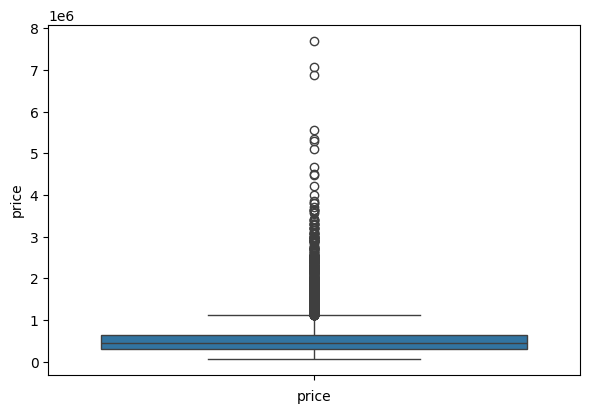

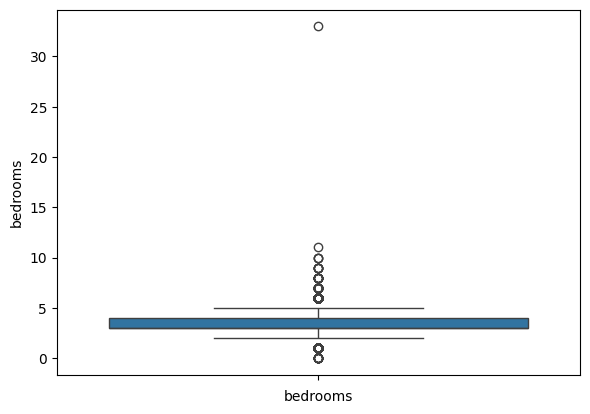

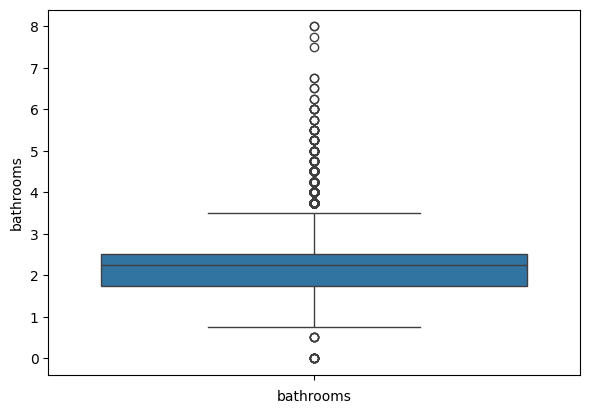

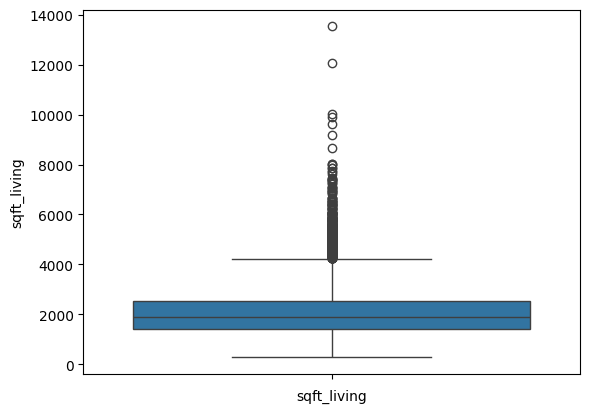

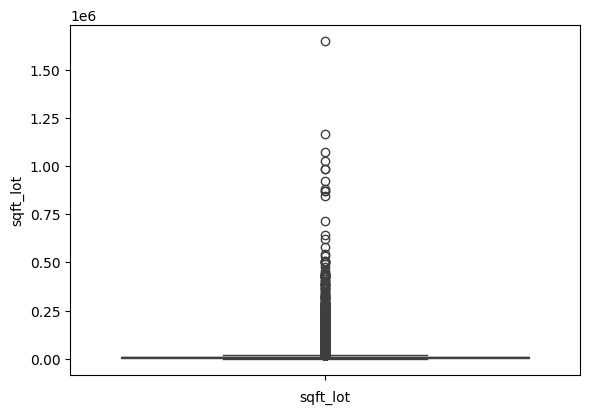

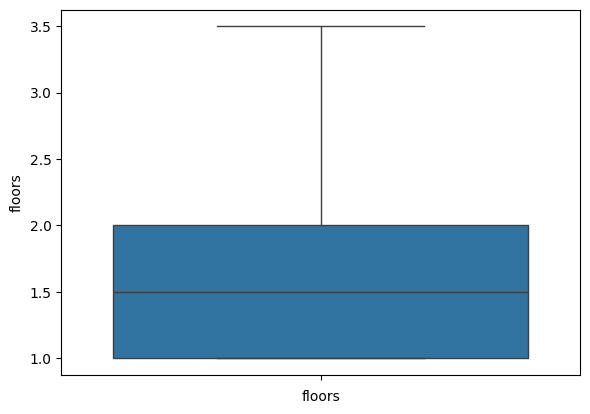

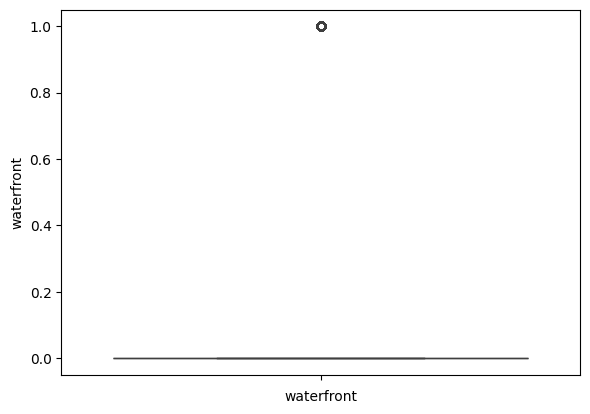

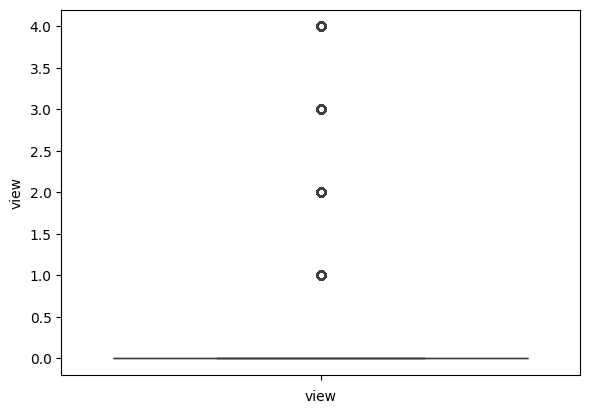

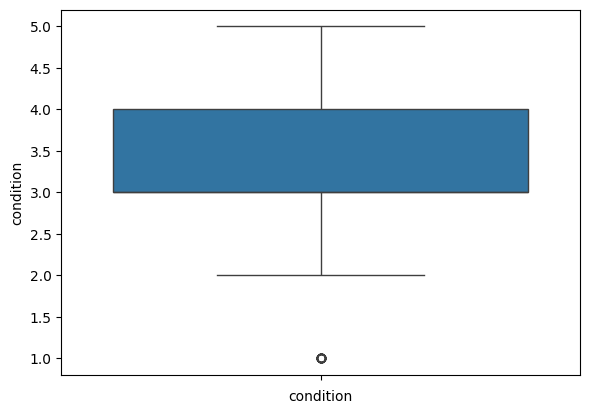

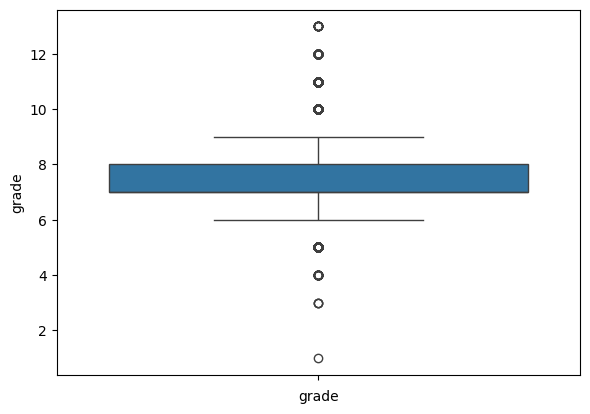

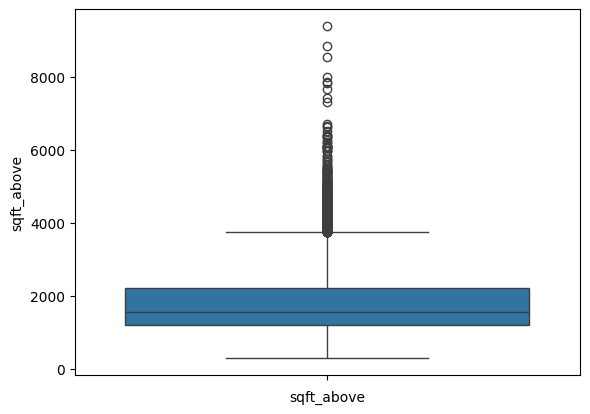

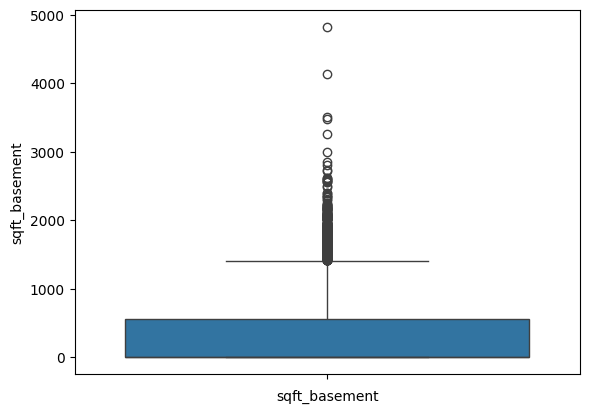

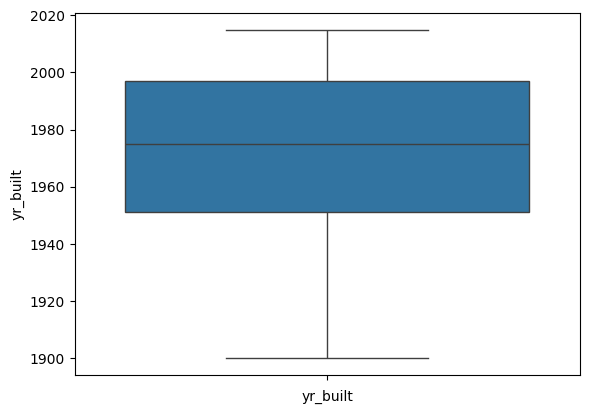

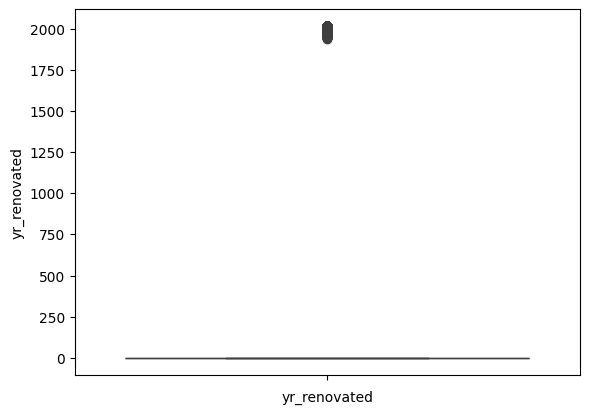

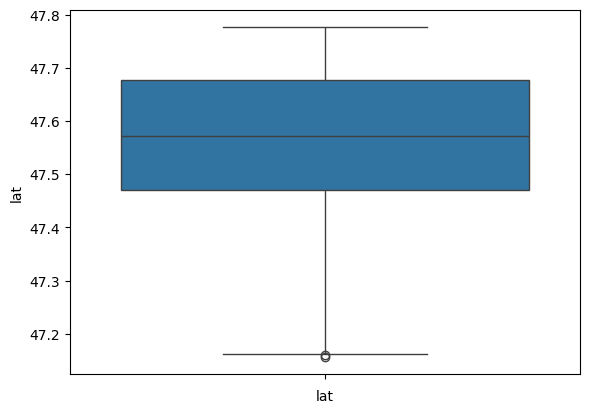

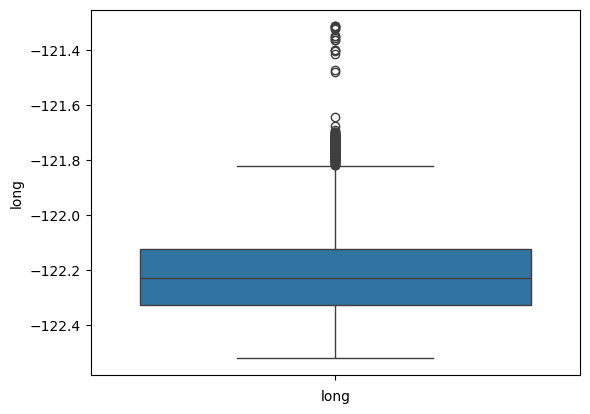

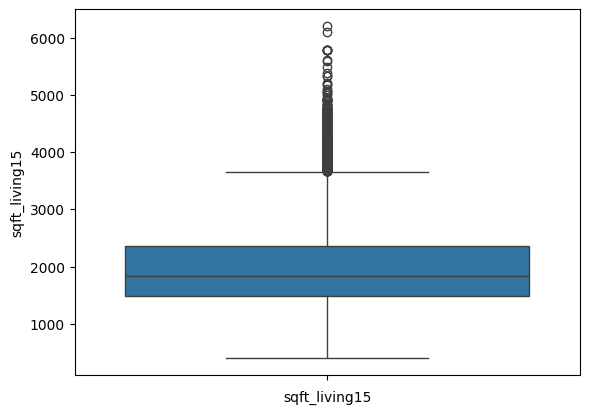

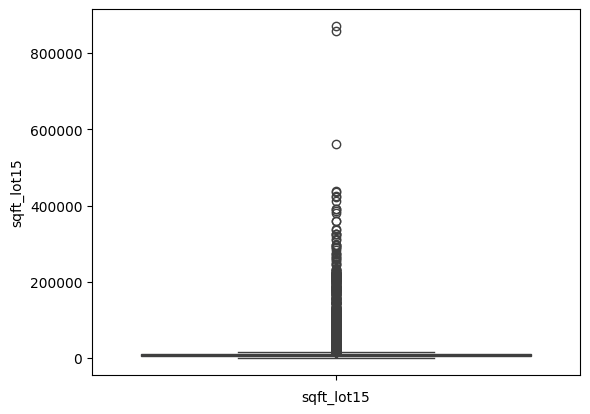

In [ ]:
# boxplot for finding the outliers
for col in df.columns:           # for loop to iterate through each column
  if(df[col].dtype != 'object'): # we are checking for column datatype boxplot of only numerical columns
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col])         # boxplot of each column in data frame (non object datatype)
    plt.tight_layout()           # for tight layout while displaying
    plt.xlabel(col)              # x label is the name of the column
    plt.show()

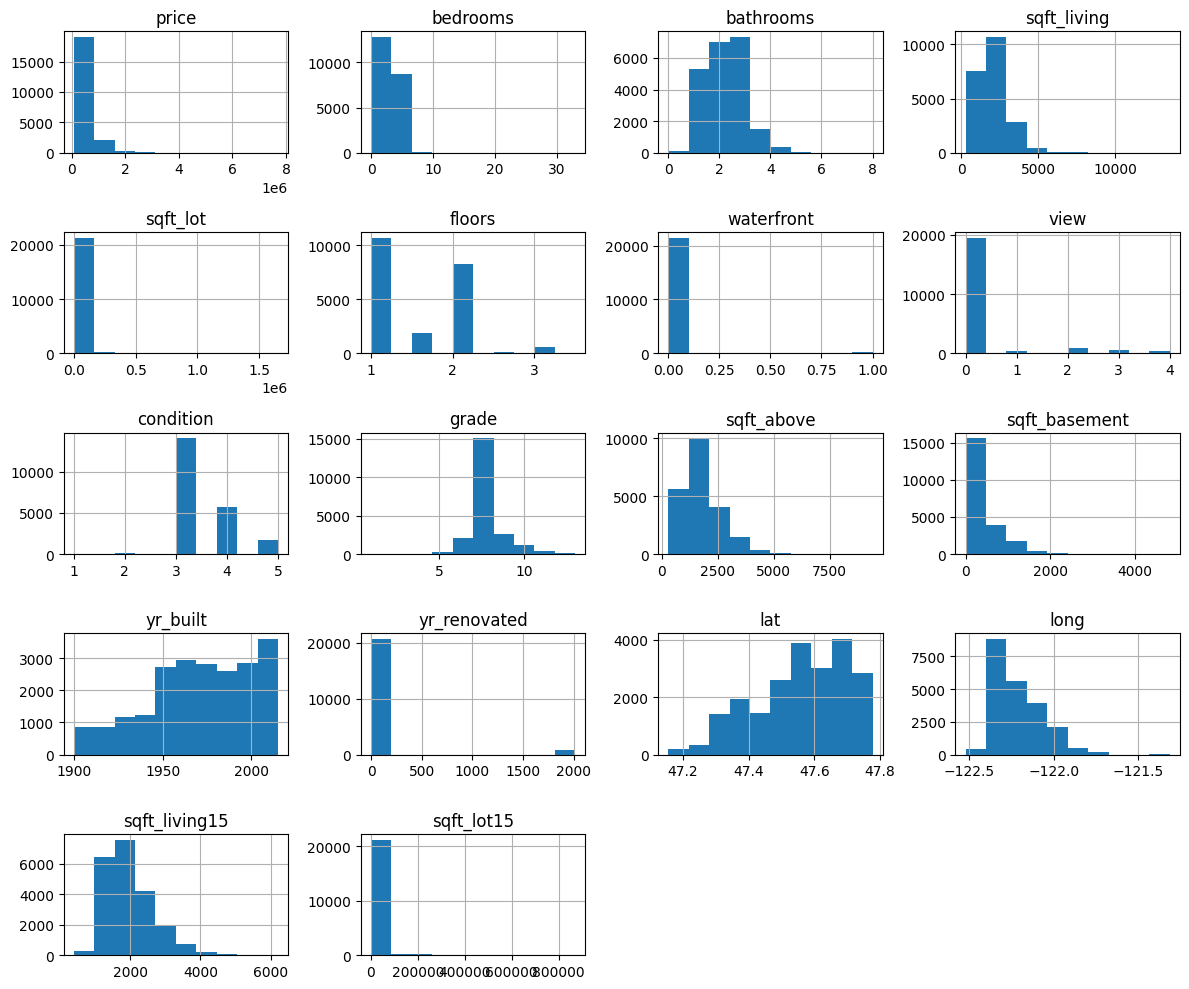

In [ ]:
# histogram plot of the dataset to vizualise the skeness of each attribute
df.hist(figsize=(12,10))
plt.title('histogram plot of the dataset')
plt.tight_layout()
plt.show()


## correlation

- correlation measure the relationship between two variables,
how much one variable would change if other were to be changed

- Positive correlation means that when one variable increases, the other also increases.
- Negative correlation means that when one variable increases, the other decreases.

In [ ]:
correlation = df.corr() # using corr() to compute the correations in the dataset

In [ ]:
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372,0.713202,0.119248


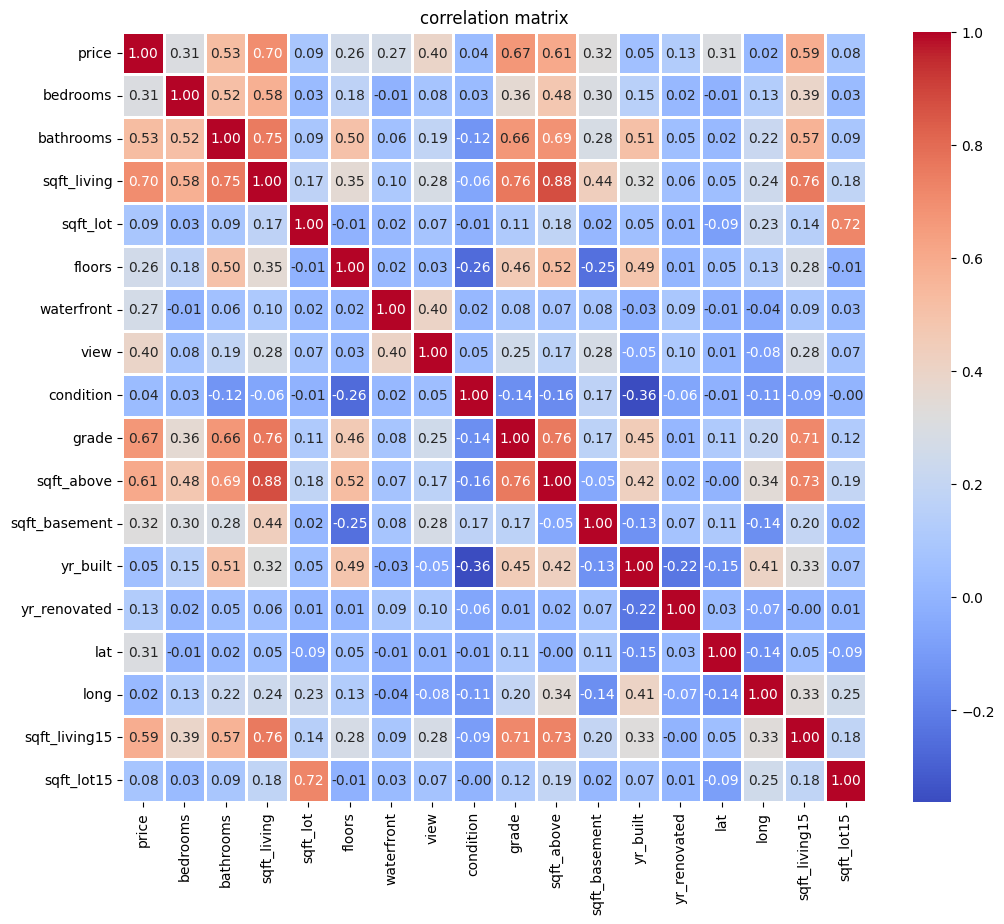

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, fmt ='.2f', linewidths=2, cmap='coolwarm') #plotting the correlations claculated using heatmaps from seaborn library
#annot = true is used to display the number on each correaltion cell of the heatmap
#fmt = .2f formats the value of correation to 2 decimal places
#linewidths to give the line with of 2 pixels
#cmap is colour map and I have set it to blues
plt.title('correlation matrix')
plt.show()

## Removing the outliers

In [ ]:
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade','price', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
for col in numerical_features:
    q1 = df[col].quantile(0.25)        # quartile 1
    q3 = df[col].quantile(0.75)        # quartile 2
    iqr = q3 - q1                      # interquartile range
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.clip(df[col], lower_bound, upper_bound)
   # values less than lower_bound will be set to lower_bound value
   # values greater than upper_bound will be set to upper_bound value

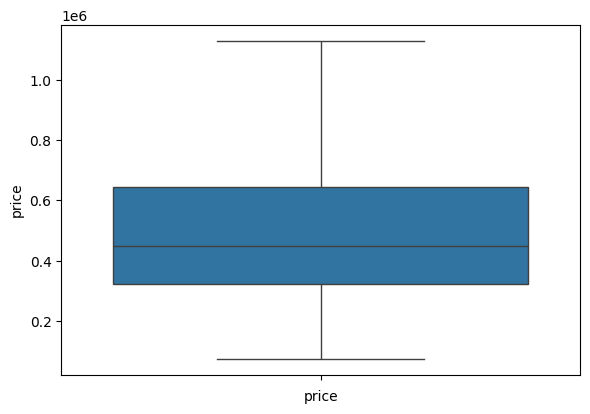

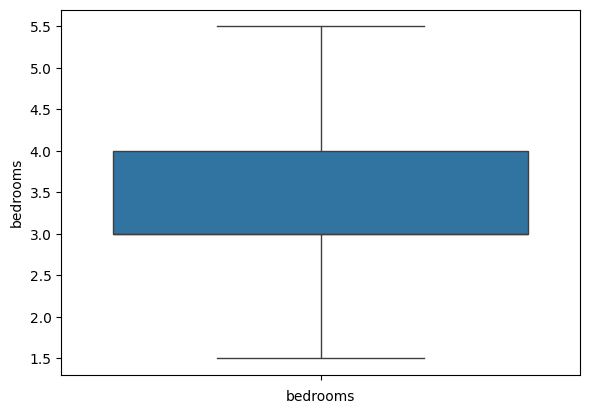

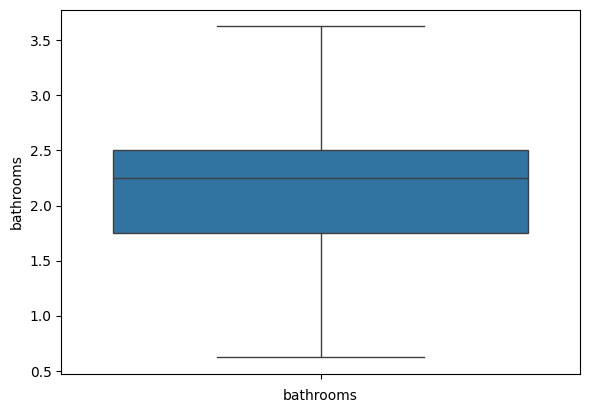

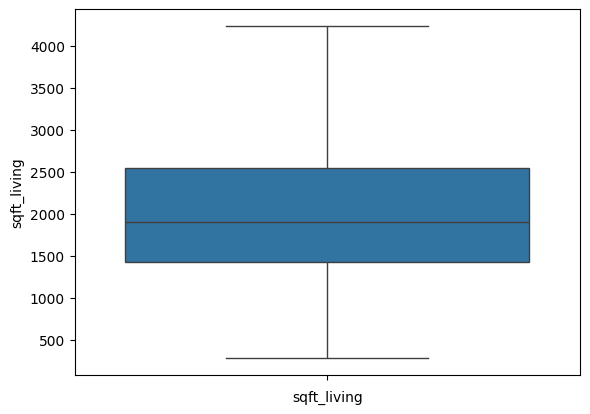

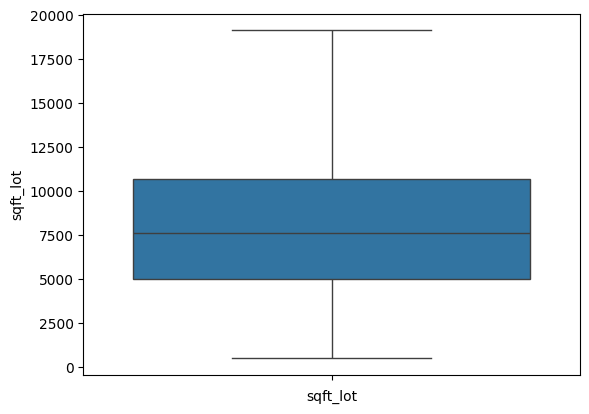

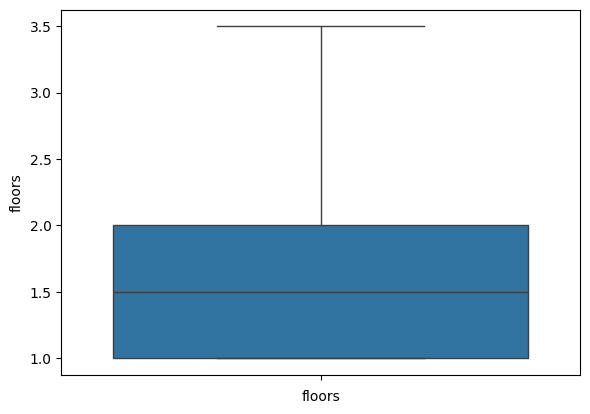

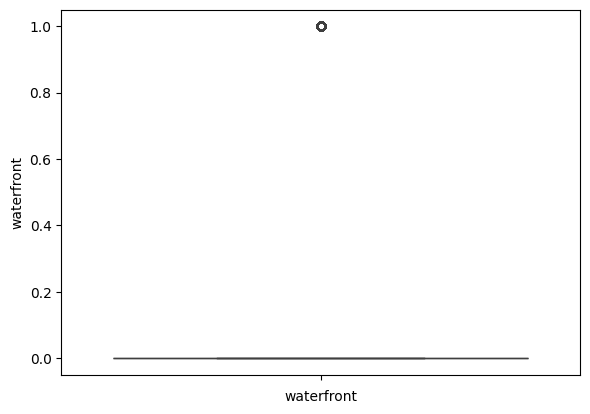

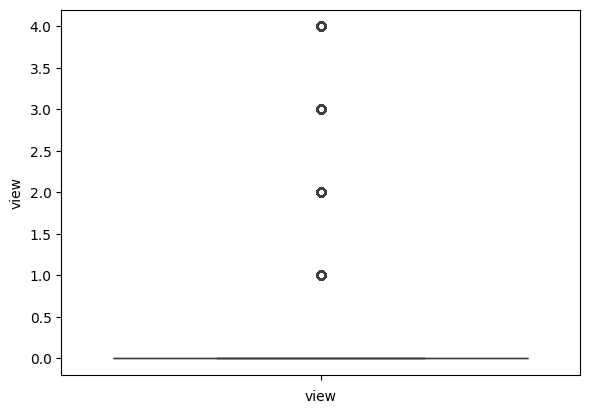

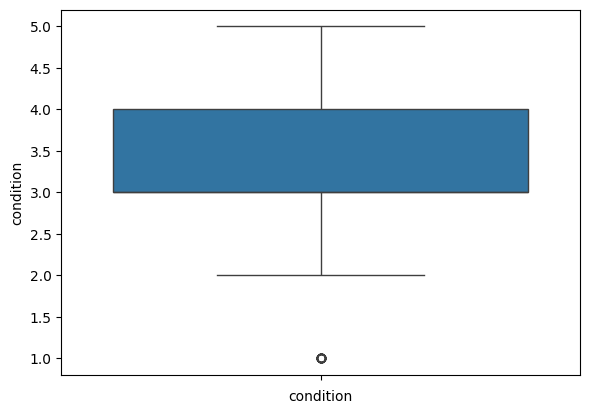

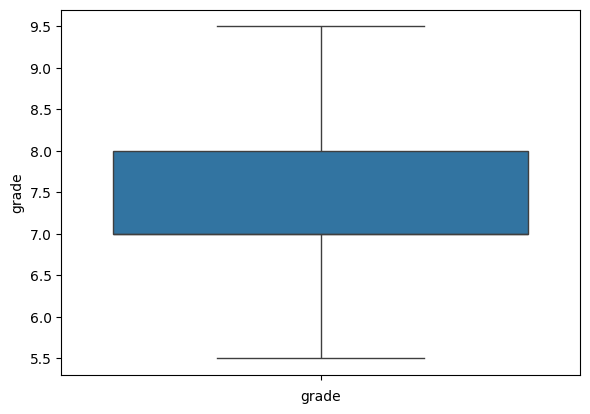

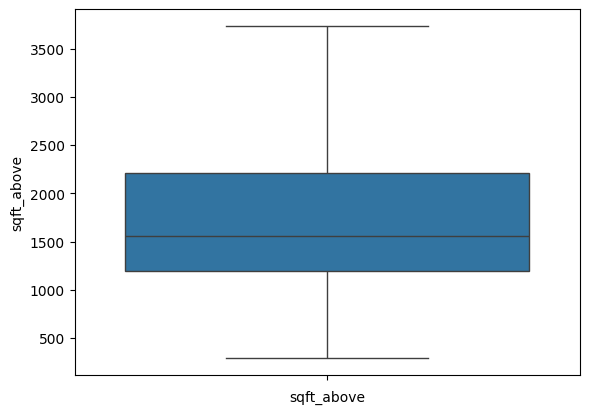

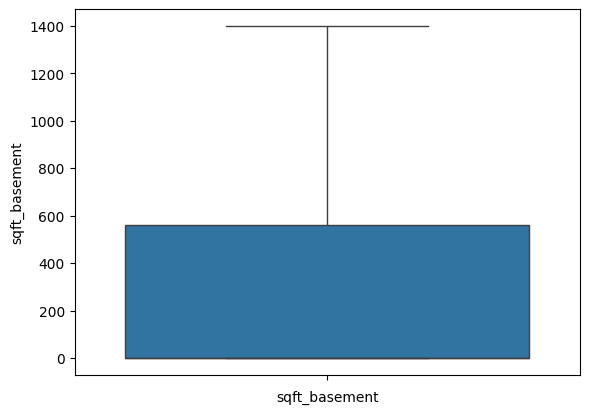

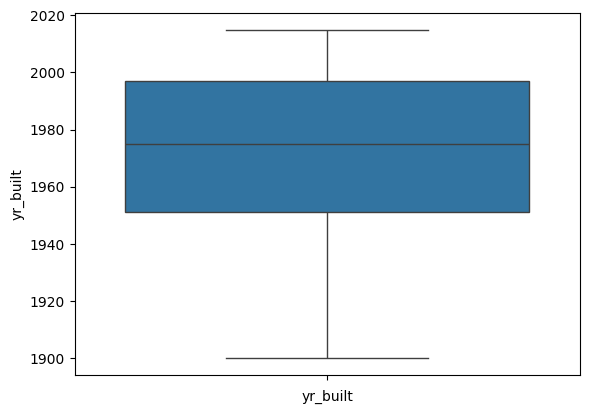

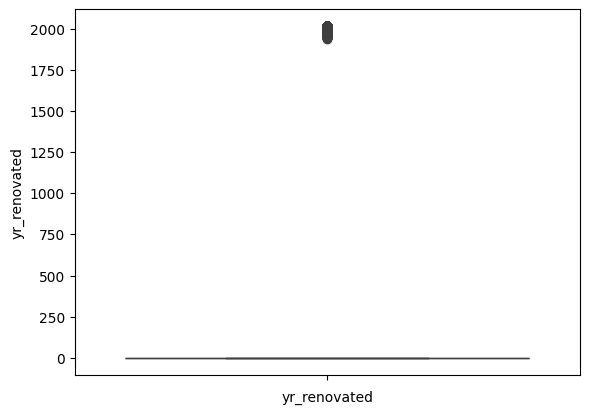

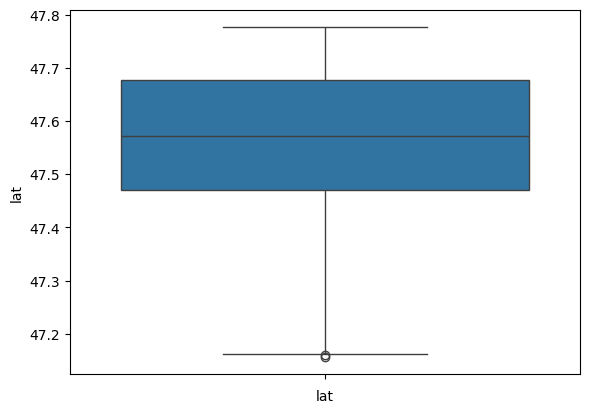

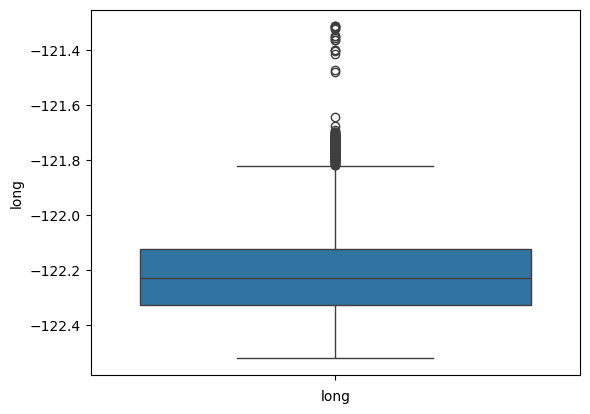

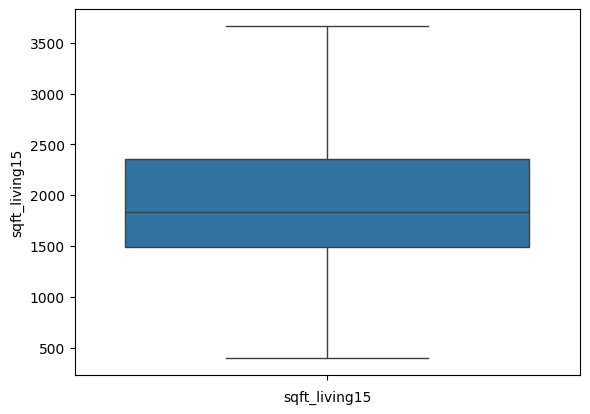

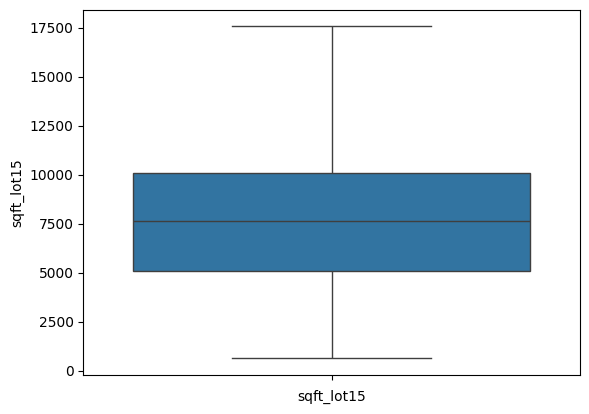

In [ ]:
# boxplot for finding the outliers
for col in df.columns:           # for loop to iterate through each column
  if(df[col].dtype != 'object'): # we are checking for column datatype
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col])         # boxplot of each column in data frame (non object datatype)
    plt.tight_layout()           # for tight layout while displaying
    plt.xlabel(col)              # x label is the name of the column
    plt.show()

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.115873e+05,3.362791,2.098477,2058.078564,8705.224448,1.494309,0.007542,0.234303,3.409430,7.598598,1769.563041,284.050155,1971.005136,84.402258,47.560053,-122.213896,1975.112849,8298.152917
std,2.500026e+05,0.854105,0.722027,839.307806,5046.482073,0.539989,0.086517,0.766318,0.650743,1.001234,764.029323,417.064559,29.373411,401.679240,0.138564,0.140828,648.999108,4363.479209
min,7.500000e+04,1.500000,0.625000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,5.500000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7618.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,10688.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,1.129575e+06,5.500000,3.625000,4234.500000,19160.000000,3.500000,1.000000,4.000000,5.000000,9.500000,3740.000000,1400.000000,2015.000000,2015.000000,47.777600,-121.315000,3665.000000,17557.500000


In [ ]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,3,7.0,1180,0,1955,0,47.5112,-122.257,1340,5650.0
1,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,3,7.0,2170,400,1951,1991,47.7210,-122.319,1690,7639.0
2,180000.0,2.0,1.00,770.0,10000,1.0,0,0,3,6.0,770,0,1933,0,47.7379,-122.233,2720,8062.0


Understanding the `target` and `feature` vairables

In machine learning, data is divided into features and the target variable to help the model learn patterns.

- Feature variables are the input data (like sqft, bedroom, etc) that the model uses to make predictions.
- The target variable is what we want to predict (house price).
-The model learns the relationship between features and the target to make accurate predictions on new data.

## Splitting the data

we are splitting the dataset into two subsets `train` and `test`
- the train data is used to fit/ train the machine learning algorithm
- the test data is used to evaluate the model which has been trained on the train data

In [ ]:
x = df.drop(['price', 'waterfront', 'yr_renovated', 'sqft_lot', 'condition', 'lat', 'long'],axis=1)
# dropping price becuase its target variable, and from correlation matrix the above features likely to be useful for predicting the house price.
y = df['price']
# we are storing target variable price in variable y

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 1)

- x_train and x_test contains the train and test data of feature variables
- y_train and y_test contain the target variable (house price)

## normalising using standard scaler

StandardScaler transforms the data so that it has a mean of 0 and a standard deviation of 1, it adjusts data so that it has a common scale.
This helps models learn better, especially when features have very different ranges

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[-0.41990267 -0.47974817  0.16125608 ... -0.60898114  0.31948705
  -0.25821219]
 [-0.41990267  0.55857853  0.37640355 ...  0.54676814 -0.59222588
  -0.89074662]
 [-1.59192902 -1.51807488 -0.9861971  ... -1.45879678 -0.56132035
  -1.02850367]
 ...
 [-0.41990267 -0.47974817 -0.10170194 ...  0.30881976  0.75216437
   2.13015058]
 [-0.41990267  0.21246963 -0.0897493  ... -0.40502538 -0.65403692
   0.22049354]
 [ 1.92415003  2.11606859  2.03782013 ...  0.41079764  2.25108223
   2.13015058]]


# Training the Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test) # evaluating the model using the test data and stroing the classified(predicted) values in the y_pred

**Fitting** in machine learning means training a model on data so it can learn patterns and relationships.

The model adjusts itself based on the training data to make predictions.
During fitting, the model finds the best values for its internal settings (parameters) to minimize errors.

notice that we are using x_train (training data of feature variables)
and y_train (training data for target variable)


- **MAE (Mean Absolute Error):** Average of absolute differences between actual and predicted values.
- **MSE (Mean Squared Error):**  Average of squared differences between actual and predicted values.
- **RMSE (Root Mean Squared Error):** Square root of MSE.
- **R² Score (Coefficient of Determination):**  How well the model explains the variance in the target.
1 = perfect, 0 = model as good as mean, negative = worse than mean. Higher is better.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


MAE: 110046.50381631959
MSE: 20333249960.94954
RMSE: 142594.70523462482
R2 Score: 0.677944643663601


# polynomial regression

- **Polynomial Regression** is an extension of linear regression that allows for non-linear relationships between the independent variable(s) and the dependent variable. It fits a polynomial equation (rather than a straight line) to the data.

- Linear Regression: Fits a straight line to the data.

- Polynomial Regression: Fits a curve (polynomial function) to the data by including higher-degree terms of the independent variable.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3) #polynomial with degree 3 (cubic)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [ ]:
x_train_poly

array([[ 1.00000000e+00, -4.19902674e-01, -4.79748174e-01, ...,
        -2.63562281e-02,  2.13013309e-02, -1.72159193e-02],
       [ 1.00000000e+00, -4.19902674e-01,  5.58578530e-01, ...,
        -3.12412889e-01, -4.69889507e-01, -7.06744685e-01],
       [ 1.00000000e+00, -1.59192902e+00, -1.51807488e+00, ...,
        -3.24061490e-01, -5.93775780e-01, -1.08797153e+00],
       ...,
       [ 1.00000000e+00, -4.19902674e-01, -4.79748174e-01, ...,
         1.20513533e+00,  3.41297704e+00,  9.66564665e+00],
       [ 1.00000000e+00, -4.19902674e-01,  2.12469629e-01, ...,
         9.43192650e-02, -3.17975762e-02,  1.07198233e-02],
       [ 1.00000000e+00,  1.92415003e+00,  2.11606859e+00, ...,
         1.07942637e+01,  1.02143790e+01,  9.66564665e+00]])

In [ ]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)


print(f'Polynomial Regression MAE: {mae_poly}')
print(f'Polynomial Regression MSE: {mse_poly}')
print(f'Polynomial Regression RMSE: {rmse_poly}')
print(f'Polynomial Regression R2 Score: {r2_poly}')

Polynomial Regression MAE: 99784.37628371672
Polynomial Regression MSE: 16792932163.808886
Polynomial Regression RMSE: 129587.54632991893
Polynomial Regression R2 Score: 0.7340192166852264


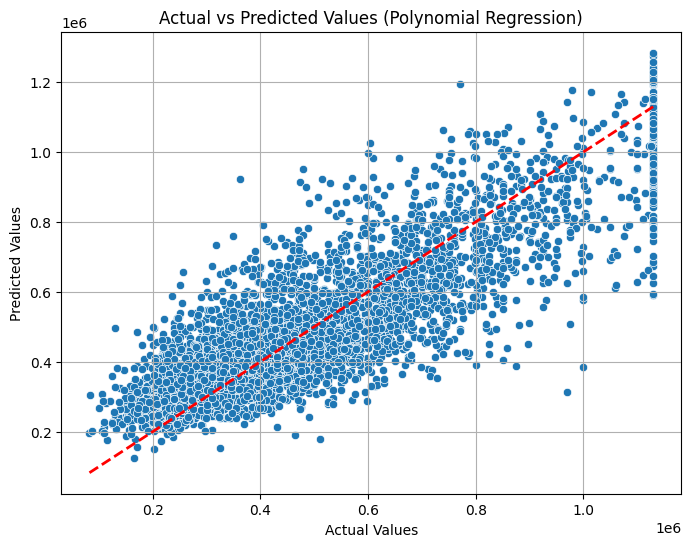

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_poly)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Polynomial Regression)')
plt.grid(True)
plt.show()

# By Bhuvan S
6th Semester | dept. CSE(AI)